In [1]:
import matplotlib.pyplot as plt
import pandas as pd

url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

In [2]:
def rename_columns(input_data):
    output_data = input_data.rename(
                              columns = {'Province/State':'subregion'
                                         ,'Country/Region':'country'
                                         ,'Lat':'lat'
                                         ,'Long':'long'
                                         }
                              )
    return output_data

def melt_data(input_data, value_var_name):
    output_data = input_data.melt(id_vars = ['country','subregion','lat','long']
                                  ,var_name = 'date'
                                  ,value_name = value_var_name)
    return output_data

def convert_dates(input_data):
    output_data = input_data.assign(date = pd.to_datetime(input_data.date,
                                    format='%m/%d/%y'))
    return output_data

def rearrange_data(input_data,value_var_name):
    output_data = (input_data
                   .filter(['country', 'subregion', 'date', 'lat', 'long', value_var_name])
                   .sort_values(['country','subregion','date','lat','long'])
                   .reset_index(drop = True)
                   )
    return output_data

def covid_get_data(input_url, value_var_name):
    data = pd.read_csv(input_url)
    data = rename_columns(data)
    data = melt_data(data,value_var_name)
    data= convert_dates(data)
    data = rearrange_data(data, value_var_name)
    return data

In [3]:
covid_confirmed = covid_get_data(url_confirmed,'confirmed')
covid_deaths = covid_get_data(url_deaths,'dead')
covid_recovered = covid_get_data(url_recovered,'recovered')

covid_deaths.drop(columns = ['lat','long'], inplace = True)
covid_recovered.drop(columns = ['lat','long'], inplace = True)

data = (covid_confirmed
                .merge(covid_deaths, on = ['country','subregion','date'], how = 'left')
                .merge(covid_recovered, on = ['country','subregion','date'], how = 'left')
             )

data.head()

country subregion       date   lat  long  confirmed  dead  recovered
0  Afghanistan       NaN 2020-01-22  33.0  65.0          0     0          0
1  Afghanistan       NaN 2020-01-23  33.0  65.0          0     0          0
2  Afghanistan       NaN 2020-01-24  33.0  65.0          0     0          0
3  Afghanistan       NaN 2020-01-25  33.0  65.0          0     0          0
4  Afghanistan       NaN 2020-01-26  33.0  65.0          0     0          0

In [4]:
data.set_index('country', inplace=True)
grouped_by_country = data.groupby(data.index)['confirmed'].last()
grouped_by_country.sort_values(ascending=False, inplace=True)
grouped_by_country.head()

country
Italy           53578
Spain           25374
Germany         22213
Iran            20610
Korea, South     8799
Name: confirmed, dtype: int64

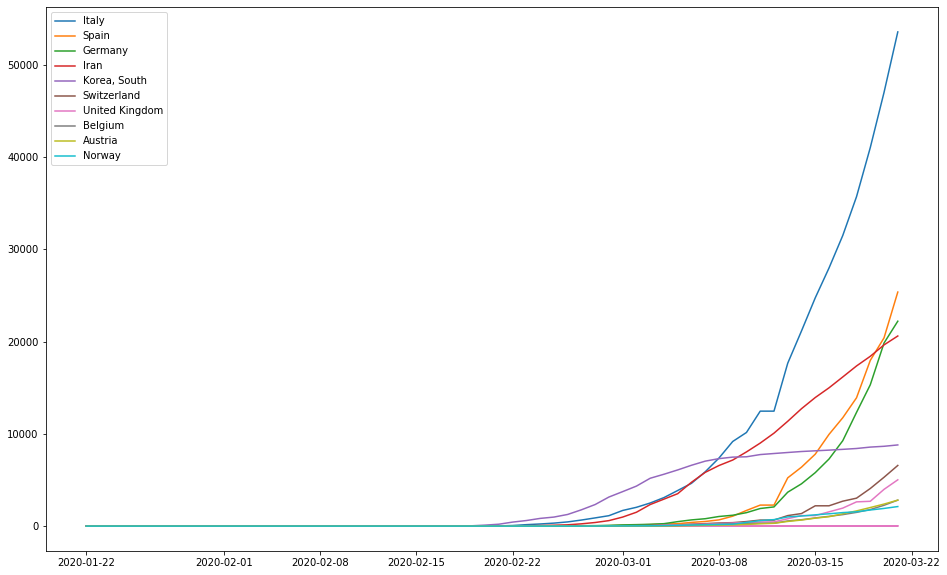

In [5]:
plt.figure(figsize=(16,10))
for country in grouped_by_country.index[:10]:
    plt.plot('date', 'confirmed', data=data.loc[country], label=country)
plt.legend()